# Exercises:
- E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?
- E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?
- E03: use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?
- E04: we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W?
- E05: look up and use F.cross_entropy instead. You should achieve the same result. Can you think of why we'd prefer to use F.cross_entropy instead?
- E06: meta-exercise! Think of a fun/interesting exercise and complete it.


In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
len(words)

32033

In [3]:
min(len(w) for w in words)

2

In [4]:
max(len(w) for w in words)

15

### Bigram Language Model 
- We are only working with 2 characters. The previous one and the next one to generate. We dont look at the rest of the word



In [5]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] #Special "start" and "end" characters
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2) #we store our generated biagrams in a tupel
        b[bigram] = b.get(bigram, 0) + 1 #Then we increment a counter in our dictionary of biagrams called b

In [6]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [7]:
import torch

In [8]:
N = torch.zeros((27,27), dtype= torch.int32)

In [9]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)} #mapping from string to integer a->1, z->26 with '.' being 0 
stoi['.'] = 0
itos ={i:s for s, i in stoi.items()}


In [10]:

for w in words:
    chs = ['.'] + list(w) + ['.'] #Special "start" and "end" characters
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] #looks up the index of character from our string to integer mapping
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1 #increments the correct field in the pytorch 2D-Array


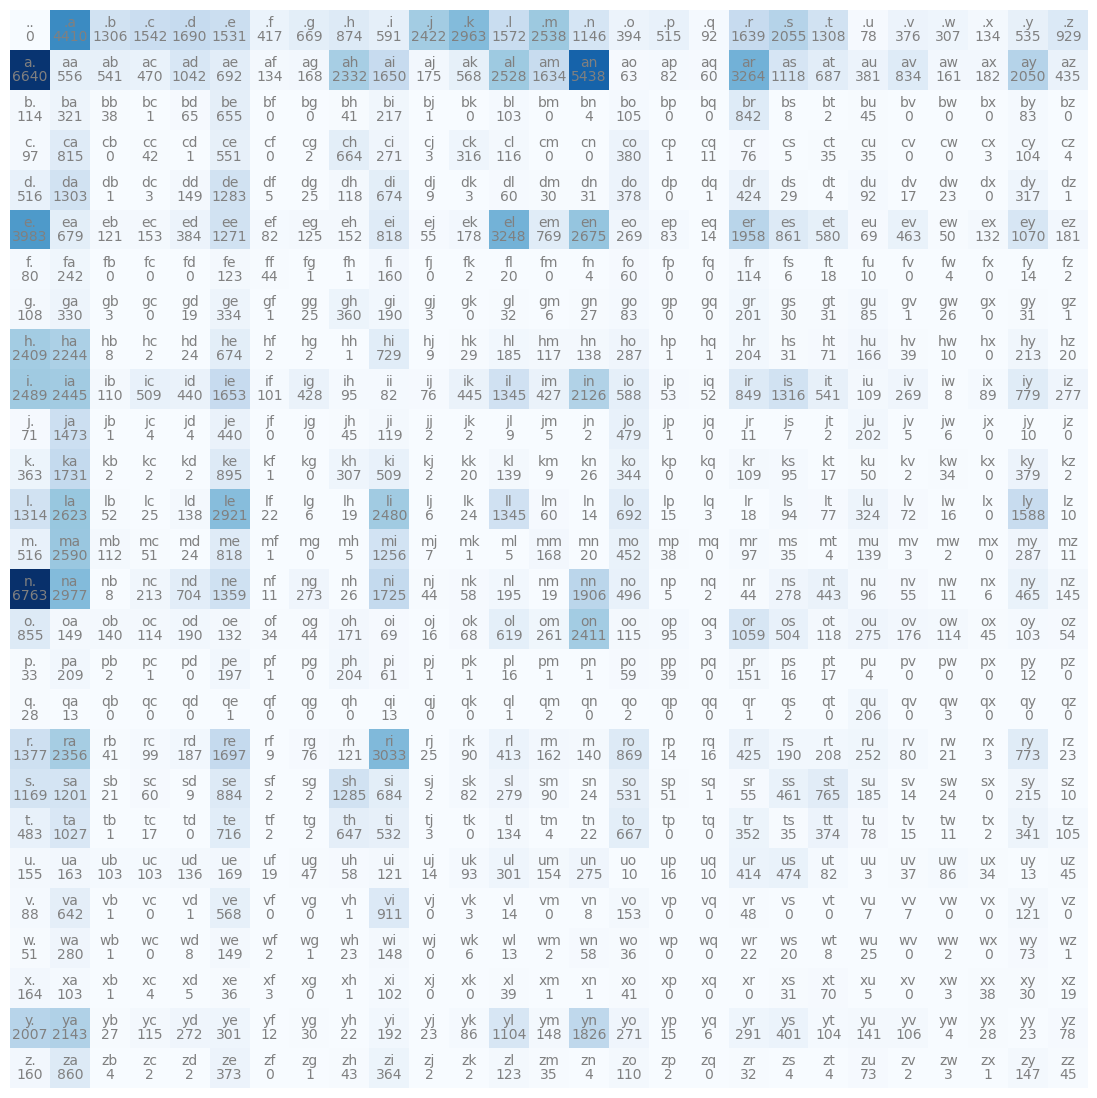

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,14))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [14]:
N[0] #equivalent to N[0, :]
N[0].shape

torch.Size([27])

In [40]:
#We need to create a probability distribution -> Normalize
p = N[0].float()
p = p / p.sum()
p


tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [42]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix] 

'j'

In [71]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [34]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [101]:
P = N.float()
P /= P.sum(1, keepdim = True)

# *Important!: Read through PyTorch documentation of broadcasting, as you can easliy run into bugs!

27, 27\
27, 1\
    If we use keepdim = True, then we will keep the second dimension (27,1)\



27, 27\
1 , 27\
If we dont keep it, we get a vector(27), then it gets alligned to the right and then a new dimension is created, so our row becomes a column and we normalize our distribution over columns now instead of rows

In [103]:
ix = 0

for i in range(5):
    out = []

    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))


ann.
inyohasan.
f.
eyaa.
ay.


In [104]:
for w in words:
    chs = ['.'] + list(w) + ['.'] #Special "start" and "end" characters
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] #looks up the index of character from our string to integer mapping
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        print(f"{ch1}{ch2}: {prob:.4f}")

.e: 0.0478
em: 0.0377
mm: 0.0253
ma: 0.3899
a.: 0.1960
.o: 0.0123
ol: 0.0780
li: 0.1777
iv: 0.0152
vi: 0.3541
ia: 0.1381
a.: 0.1960
.a: 0.1377
av: 0.0246
va: 0.2495
a.: 0.1960
.i: 0.0184
is: 0.0743
sa: 0.1482
ab: 0.0160
be: 0.2476
el: 0.1590
ll: 0.0964
la: 0.1879
a.: 0.1960
.s: 0.0642
so: 0.0655
op: 0.0120
ph: 0.1988
hi: 0.0957
ia: 0.1381
a.: 0.1960
.c: 0.0481
ch: 0.1880
ha: 0.2946
ar: 0.0963
rl: 0.0325
lo: 0.0496
ot: 0.0149
tt: 0.0671
te: 0.1285
e.: 0.1950
.m: 0.0792
mi: 0.1891
ia: 0.1381
a.: 0.1960
.a: 0.1377
am: 0.0482
me: 0.1232
el: 0.1590
li: 0.1777
ia: 0.1381
a.: 0.1960
.h: 0.0273
ha: 0.2946
ar: 0.0963
rp: 0.0011
pe: 0.1920
er: 0.0959
r.: 0.1084
.e: 0.0478
ev: 0.0227
ve: 0.2208
el: 0.1590
ly: 0.1138
yn: 0.1868
n.: 0.3690
.a: 0.1377
ab: 0.0160
bi: 0.0820
ig: 0.0242
ga: 0.1713
ai: 0.0487
il: 0.0760
l.: 0.0941
.e: 0.0478
em: 0.0377
mi: 0.1891
il: 0.0760
ly: 0.1138
y.: 0.2053
.e: 0.0478
el: 0.1590
li: 0.1777
iz: 0.0156
za: 0.3586
ab: 0.0160
be: 0.2476
et: 0.0284
th: 0.1162
h.: 0.3163